# Анализ рынка компьютерных игр

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы долларов)
- **EU_sales** — продажи в Европе (миллионы долларов)
- **JP_sales** — продажи в Японии (миллионы долларов)
- **Other_sales** — продажи в других странах (миллионы долларов)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (возрастная категория).

Данные за 2016 год могут быть неполными.

### Задание

**По представленным данным выявить закономерности, определяющие успешность игры.**

---

## Изучение общей информации о данных

Импортируем необходимые библиотеки

In [66]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from matplotlib import rcParams
from scipy import stats as st

Считываем таблицу из .csv файла

In [67]:
games_data = pd.read_csv('/datasets/games.csv')

Посмотрим информацию о таблице

In [68]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [69]:
games_data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод
Данные загрузились корректно, имеем таблицу с **16715** записями о различных играх.

При первичном анализе заметы следующие проблемы:
- Названия столбцов содержат заглавные буквы
- Большое количество (**до 50%**) пропусков в столбцах **Critic_Score, User_Score, Rating**
- Столбец **User_Score** имеет тип данных **object**
- Целочисленные значения (столбцы **Year_of_release** и **Critic_score**) имеют тип данных **float64**

Вероятно, присутствуют и другие проблемы, которые обнаружатся при более детальном рассмотрении таблицы.

---

## Предобработка данных

**Переименование столбцов**

Еще раз посмотрим информацию о таблице

In [70]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Названия всех столбцов начинаются с заглавных букв. Исправим это:

In [71]:
games_data.columns = games_data.columns.str.lower()
games_data.head(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь все столбцы имеют корректные названия.

**Приведение столбца _user_score_ к типу данных float**

Должно быть, строковый тип данных столбца вызван присутвием некоторого количества строковых значений.

Найдем эти значения:

In [72]:
games_data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Проблему вызвало значение **tbd** (To be determined). Заменим это значение на невозможное, например **-1**.\
Такой метод позволит временно исключить строки с этим значением при анализе.

In [73]:
games_data.user_score = pd.to_numeric(games_data.user_score.replace('tbd', -2), downcast='float')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float32
rating             9949 non-null object
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


Столбец **user_score** теперь имеет тип **float32**, что свидетельствует об успешности замены.

**Заполнение пропусков**

Видим, что самое большое количество пропусков в столбцах **critic_score, user_score, rating, year_of_release**\
В первых двух столбцах указана информация о рейтинге игры от критиков и пользователей соответственно.\
В столбце **rating** записана информация о возрастном рейтинге игры.
В столбце **rating** указан год выпуска игры.
Внимательнее рассмотрим первые два столбца.

По сути, они содержат одну и ту же информацию (рейтинг игры), заполненную двумя группами людей (критиками и пользователями).\
Поэтому можно предположить, что значения в этих столбцах тесно связаны, и будет уместно заполнить пропущенные значения в одном столбце, опираясь на соответствующие значения в другом.

Проверим, насколько значения этих столбцов коррелируют между собой:

In [74]:
# данные имеют не нормальное распределение, поэтому применяем метод спирмена
games_data.user_score.corr(games_data.critic_score, method='spearman')

0.5590261251846391

Корреляция, как и предполагалось, имеется, однако не настолько сильная, чтобы можно было заполнить пропуски в этих столбцах, не исказив данные.

В связи с этим заполним пропуски в столбцах **critic_score, user_score, rating, year_of_release** на невозможное значение, например **-2**, которое в дальнейшем будет служить маркером (**-1** уже отдано под замену значения **tbd**).

In [75]:
for column in ['critic_score', 'user_score', 'rating', 'year_of_release']:
    games_data[column] = games_data[column].fillna(-2)

games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float32
rating             16715 non-null object
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


Видим, что осталость по два пропуска в столбцах **name** и **genre**.
Взглянем на них:

In [76]:
games_data[games_data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-2.0,-2.0,-2
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-2.0,-2.0,-2


Записи о старых играх, причем большинство данных пропущено. Учитывая объем таблицы, эти строки не несут важной информации.\
Удалим их.

In [77]:
games_data = games_data.dropna()
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float32
rating             16713 non-null object
dtypes: float32(1), float64(6), object(4)
memory usage: 1.5+ MB


**Оптимизация типов данных столбцов**

Для столбцов с числовыми значениями, приведем типы данных к оптимальным.

In [78]:
# столбцы с целочисленными значениями
for column in ['year_of_release', 'critic_score']:
    games_data[column] = pd.to_numeric(games_data[column], downcast='integer')

# столбцы с дробными значениями
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'user_score']:
    games_data[column] = pd.to_numeric(games_data[column], downcast='float')
    
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int16
genre              16713 non-null object
na_sales           16713 non-null float32
eu_sales           16713 non-null float32
jp_sales           16713 non-null float32
other_sales        16713 non-null float32
critic_score       16713 non-null int8
user_score         16713 non-null float32
rating             16713 non-null object
dtypes: float32(5), int16(1), int8(1), object(4)
memory usage: 1.0+ MB


Видим, что типы данных столбцов изменились, а объем памяти, занимаемый таблицей, уменьшился на **30%**.\
Оптимизация проведена успешно.

### Вывод
В результате предобработки данных были решены следующие проблемы:
- Названия столбцов приведены к строчным
- Заменено значение **tbd** в столбце **user_score**
- Пропуски заполнены маркерами
- Оптимизированы типы данных столбцов с числовыми значениями.

Столбец **year_of_release** приведен к типу **int** (вместо **datetime**), т.к. в столбце указан лишь год.

---

## Анализ данных

#### В рамках анализа предстоит решить следующие задачи:
- Определить количество выпускаемых игр по годам.
- Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
- Определить примерный срок, за который появляются новые и исчезают старые платформы.
- Определить актуальный перид. Критерий — данные этого периода помогут построить прогноз на 2017 год.
- Выбрать несколько потенциально прибыльных платформ.
- Пострить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Определить, велика ли разница в продажах в целом, и найти разницу в средних продажах на разных платформах.
- Оценить влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Верны ли эти выводы для других платформ?
- Посмотреть на общее распределение игр по жанрам. Определить жанры с самой высокой и низкой прибылью, оценить отличие от остальных жанров.

**Суммарные продажи**

Для анализа нам понадобится также информация о суммарных продажах каждой из игр.\
Добавим её в столбец **world_sales**.

In [79]:
games_data['world_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,-2,-2.0,-2,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,8.3,E,35.520000


**Количество выпускаемых игр по годам**

Для наглядного отображения воспользуемся гистограммой:

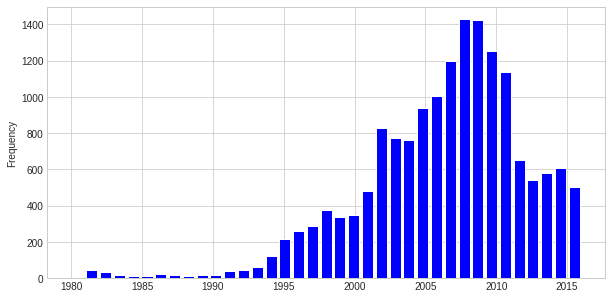

In [80]:
plt.style.use('seaborn-whitegrid')
games_data[games_data.year_of_release > 0].year_of_release.plot.hist(
bins=len(games_data[games_data.year_of_release > 0].year_of_release.unique()),
grid=True,
rwidth=0.8,
figsize=(10,5),
color='b'
)

Таблица содержит записи об играх начиная с **1980** года.\
До **1990** года не велось активной разработки игр, поэтому их количество не превышало **50** штук в год.\
Видим, что начиная с **1990** года, начался активный рост, а пик пришелся на **2008 - 2009** года, с более чем **1400** выпускаемыми играми в год.\
После этого периода начался спад, который продлился до **2012** года. С этого момента, в год выпускается около **500-600** игр.

Исходя из гистограммы, можно сделать вывод, что **актуальным** является **период с 2013 года**.

Создадим таблицу `new_games_data`, в которую занесем данные по играм, выпущенным с **2013** года:

In [81]:
new_games_data = games_data[games_data.year_of_release >= 2013]
len(new_games_data)

2233

В новой таблице 2233 записи. Достаточно для проведения анализа.

**Распределение продаж по платформам в зависимости от года**

Определим топ-10 платформ с наибольшими суммарными продажами:

In [82]:
top_10_platforms_by_sales = (games_data
.pivot_table(index='platform', values='world_sales', aggfunc='sum')
.sort_values('world_sales', ascending=False)
).head(10).index.tolist()
top_10_platforms_by_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

Для построения распределения используем "ящик с усами"

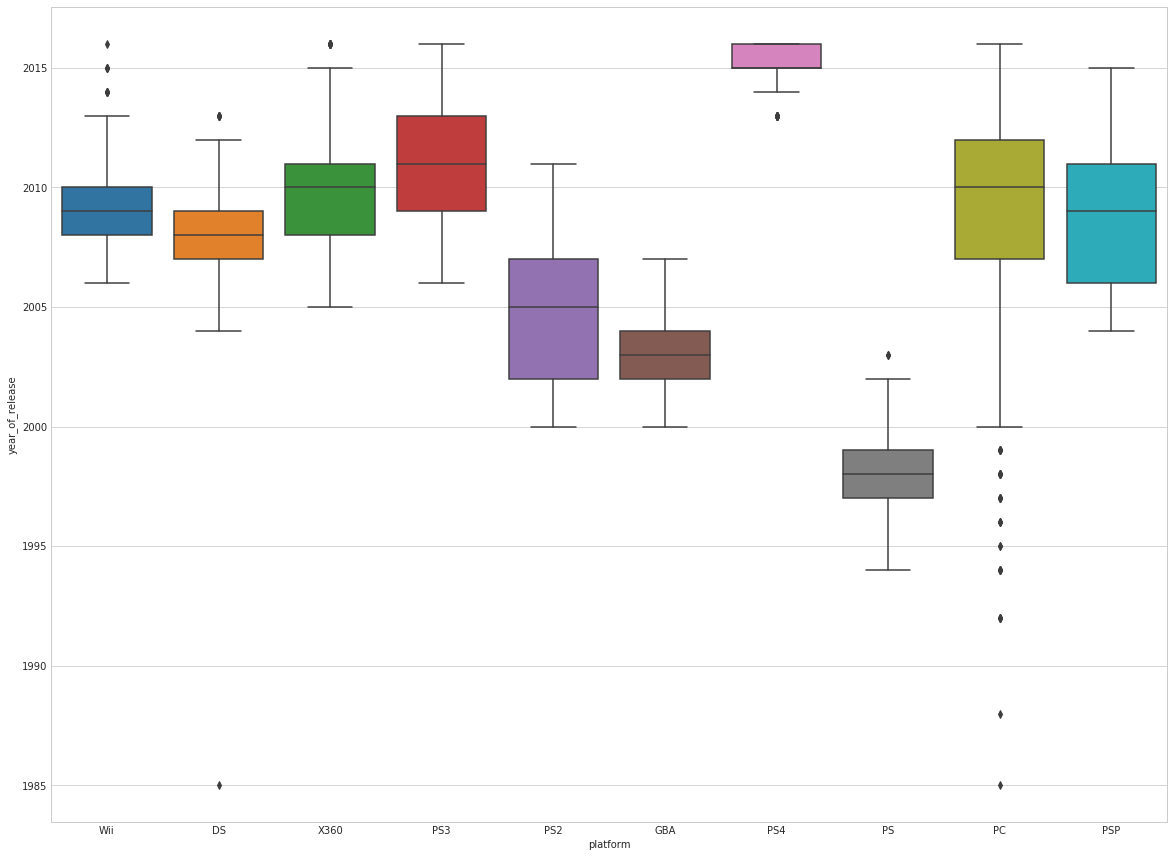

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,15))
sns.boxplot(
data=games_data[(games_data.platform.isin(top_10_platforms_by_sales)) & (games_data.year_of_release > 0)],
x="platform",
y="year_of_release",
)

Исходя из графика можно сделать следующие выводы:
- Примерный **срок жизни** платформы - **8 лет**.
- При этом **2-3 года** платформа набирает популярность
- **Пик** популярности длится порядка **3-х лет**, затем начинается спад.
- **Исключением** являются **персональные компьютеры** (**PC**). Благодаря возможности обновления комплектующих, в отличие от остальных игровых платформ, **не теряют свою актуальность**.

**Определение перспективных платформ**

По данным таблицы `new_games_data` определим платформы с максимальными суммарными продажами.

In [84]:
platform_sales_by_year = (new_games_data
.pivot_table(index='platform', columns='year_of_release', values='world_sales', aggfunc='sum')
)
platform_sales_by_year.columns = ['2013', '2014', '2015', '2016']
platform_sales_by_year.sort_values('2016', ascending=False)

,2013,2014,2015,2016
platform,,,,
PS4,25.990000,100.000000,118.900002,69.25
XOne,18.960001,54.070000,60.139999,26.15
3DS,56.570000,43.759998,27.780001,15.14
PC,12.380000,13.280001,8.520000,5.25
WiiU,21.650000,22.030001,16.350000,4.60
PSV,10.590000,11.900000,6.250000,4.25
PS3,113.250000,47.759998,16.820000,3.60
X360,88.580002,34.740002,11.960000,1.52
Wii,8.590000,3.750000,1.140000,0.18


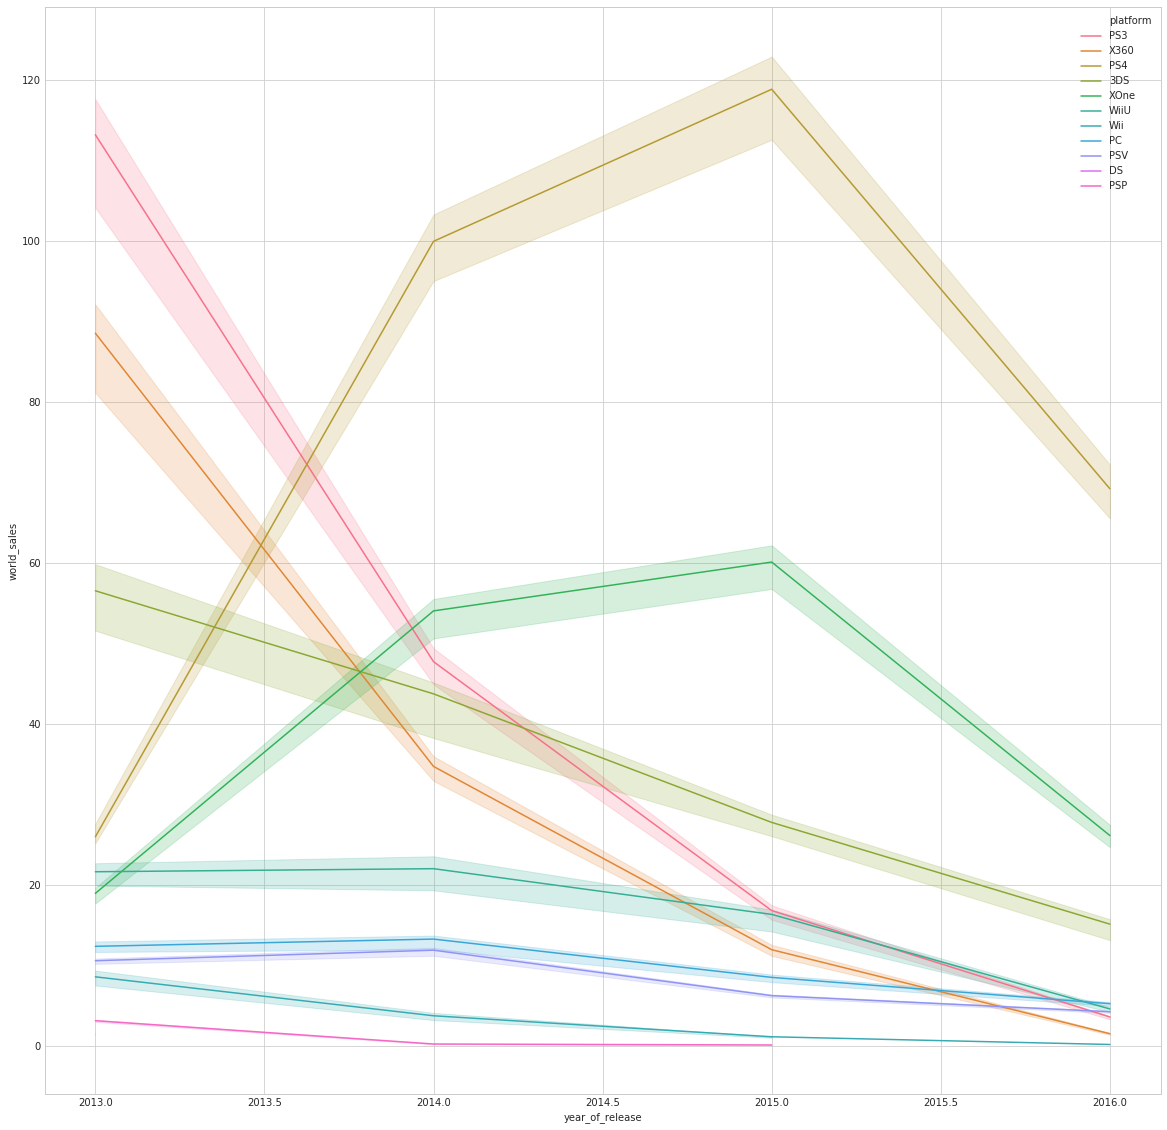

In [85]:
plt.figure(figsize=(20,20))
sns.lineplot(
data=new_games_data,
x='year_of_release',
y='world_sales',
hue='platform',
estimator='sum',
ci=20
)

Многие платформы имеют сильный спад после **2015** года из-за того, что данные за **2016** год неполные.

На основе полученных данных можно сделать вывод, что самыми перспективными платформами на 2016 год являются **PS4** и **XOne**, т.к. только у них отмечается высокий рост продаж.\
Также можно отметить платформы **3DS** и **PC**.\
**3DS**, несмотря на тенденцию к снижению объема продаж, все еще занимают значительную долю рынка, а **PC**, как было отмечено ранее, самая стабильная платформа, не теряющая свою долю на рынке с течением времени.

Запишем перспективные платформы в переменную **top_platforms**

In [86]:
top_platforms = platform_sales_by_year.sort_values('2016', ascending=False).head(4).index.tolist()
top_platforms

['PS4', 'XOne', '3DS', 'PC']

Избегать же стоит таких платформ как **PS3, X360, Wii, DS, PSP**. Их жизненный цикл подходит к концу, а продажи игр падают с каждым годом.

**Глобальные продажи в зависимости от платформы**

Построим график "ящик с усами" по глобальным продажам каждой игры и разбивкой по платформам. (Для актуальных платформ)

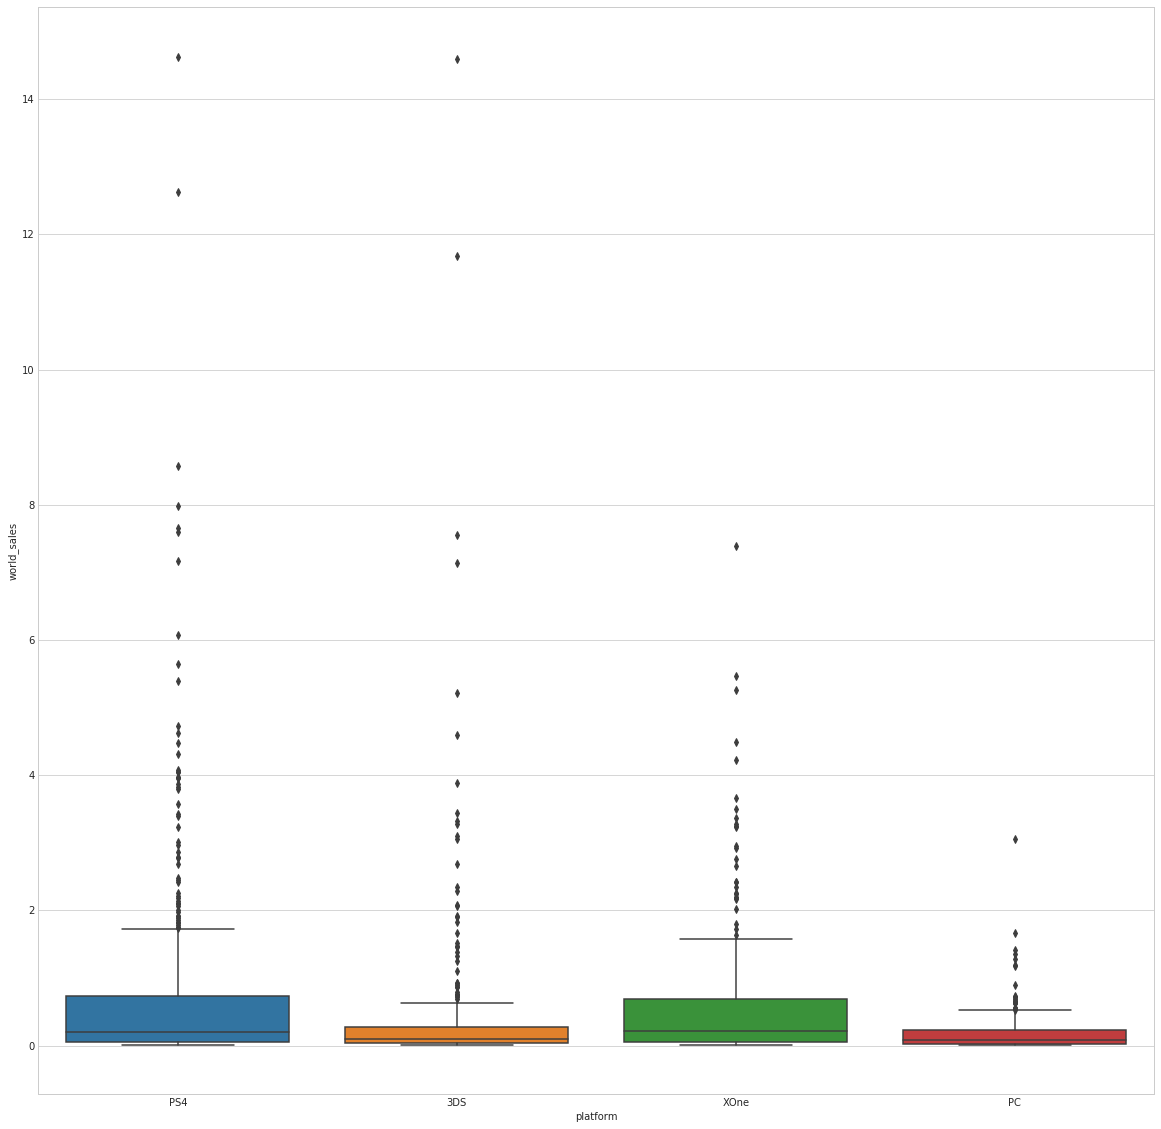

In [87]:
plt.figure(figsize=(20,20))
sns.boxplot(
data=new_games_data[new_games_data.platform.isin(top_platforms)],
x='platform',
y='world_sales',
)

Видно, что **PS4** имеет как самые высокие продажи в целом, так и большее количество игр с рекордно высокими продажами.
Следом идет **XOne**, который, судя по графику, имеет медианное значение даже выше, чем у **PS4**.

Посмотрим на медианы и средние значения продаж по платформам:

In [88]:
(new_games_data[new_games_data.platform.isin(top_platforms)]
.pivot_table(index='platform', values='world_sales', aggfunc=['median', 'mean'])
)

,median,mean
,world_sales,world_sales
platform,,
3DS,0.09,0.472772
PC,0.08,0.208624
PS4,0.20,0.801378
XOne,0.22,0.645020


Действительно, **XOne** имеет медианное значение **0.22** против **0.20** у **PS4**. Это говорит о том, что на **PS4** выходит больше игр, имеющих рекодно большие продажи, однако рядовые игры продаются лучше на **XOne**.

**3DS** также имеет довольно высокий показатель средних продаж (**0.47**) при низком (**0.09**) медианном значении, что говорит о наличии игр с рекордно высокими показателями продаж.

**Оценка влияния отзывов пользователей и критиков на продажи игр**

Для определения связи отзывов с продажами игр, воспользуемся диаграммой рассеяния.
Построим диаграмму для платформы, лидирующей по объему продаж - **PS4**

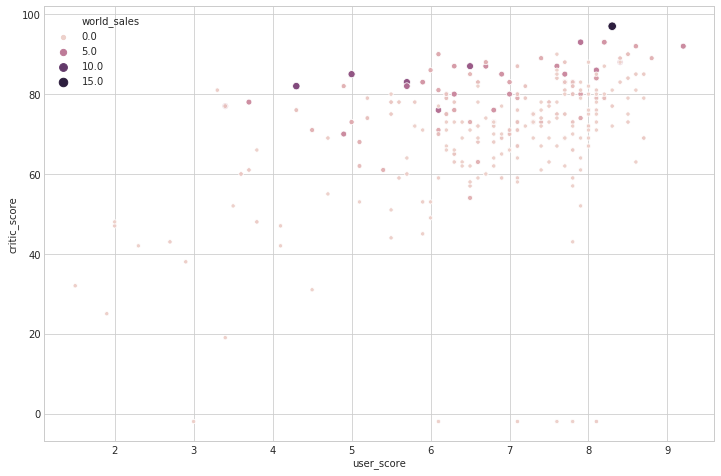

In [89]:
plt.figure(figsize=(12,8))
sns.scatterplot(
data=new_games_data[(new_games_data.platform == 'PS4') & (new_games_data['user_score'] > 0)],
x='user_score',
y='critic_score',
hue='world_sales',
size='world_sales',
estimator='sum'
)

Из диаграммы рассеяния видно, что на успешность игры влияют прежде всего оценки критиков, нежели пользователей.

Посчитаем корреляцию между отзывами и продажами, чтобы убедиться в этом:

In [90]:
print('user_score - sales corr:',
new_games_data[(new_games_data.platform == 'PS4') & (new_games_data['user_score'] > 0)]
.user_score.corr(new_games_data.world_sales, method='spearman')
)

print('critic_score - sales corr:',
new_games_data[(new_games_data.platform == 'PS4') & (new_games_data['critic_score'] > 0)]
.critic_score.corr(new_games_data.world_sales, method='spearman')
)

user_score - sales corr: -0.02786132867912609
critic_score - sales corr: 0.5076670188879598


Выходит, есть средняя корреляция между продажами и оценками критиков, однако нет корреляции (по крайней мере линейной) с оценками пользователей.

Скорее всего, такой результат вызван наличием нескольких игр с большим объемом продаж, но имеющих низкие оценки от пользователей.\
Коэффициенты корреляции чувствительны к таким выбивающимся значениям.

Проверим, верно ли это для второй по объему продаж платформе - **XOne**.

In [91]:
print('user_score - sales corr:',
new_games_data[(new_games_data.platform == 'XOne') & (new_games_data['user_score'] > 0)]
.user_score.corr(new_games_data.world_sales, method='spearman')
)

print('critic_score - sales corr:',
new_games_data[(new_games_data.platform == 'XOne') & (new_games_data['critic_score'] > 0)]
.critic_score.corr(new_games_data.world_sales, method='spearman')
)

user_score - sales corr: -0.09987922387628013
critic_score - sales corr: 0.5309613295270312


Да. Выводы, сделанные на основе данных платформы **PS4**, также верны и для **XOne**.

**Распределение игр по жанрам**

Взглянем на зависимость продаж от жанра игры:

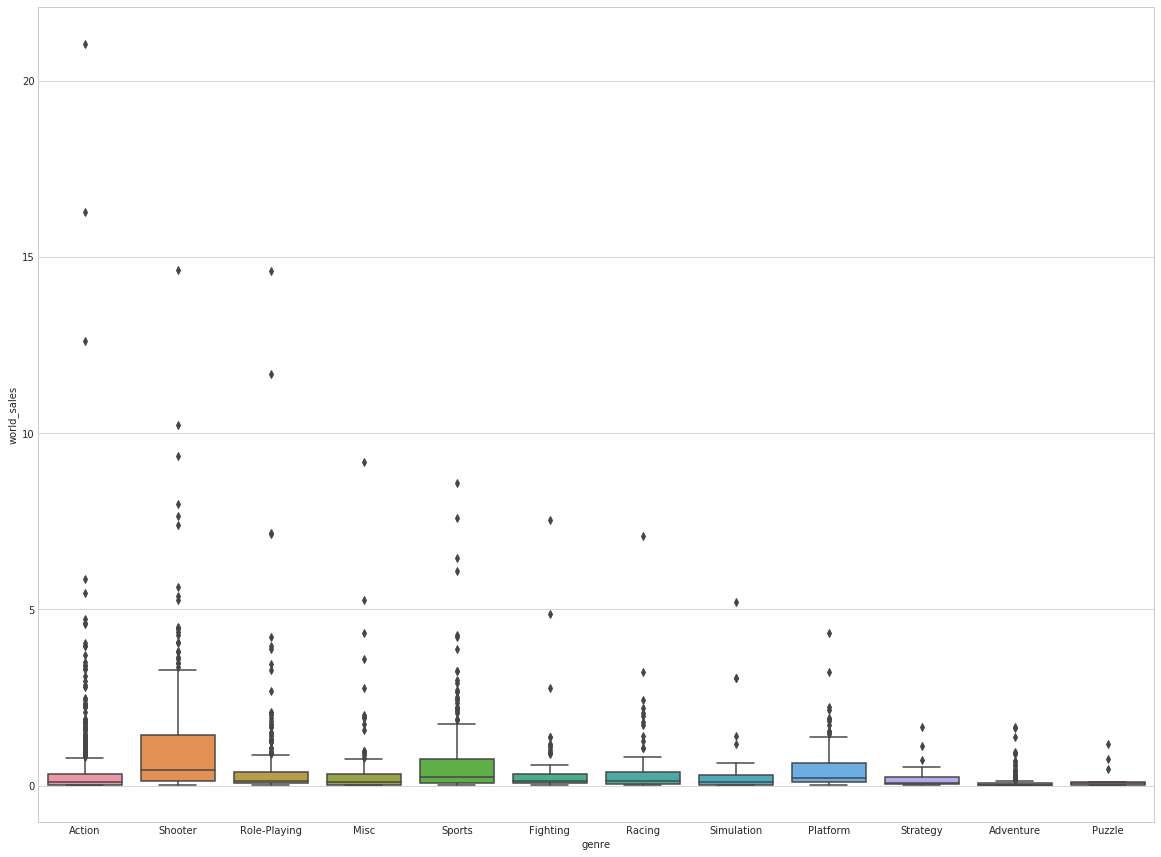

In [92]:
plt.figure(figsize=(20,15))
sns.boxplot(
data=new_games_data,
x="genre",
y="world_sales",
)

Судя по всему, самыми прибыльными жанрами являются **Shooter, Sports** и **Platform**.

Узнаем, как сильно средние продажи в этих жанрах отличаются от таковых в других жанрах:

In [93]:
new_games_data.pivot_table(index='genre', values='world_sales', aggfunc='mean').sort_values('world_sales', ascending=False)

,world_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


**Shooter** серьезно опережает все жанры, имея показатель средних продаж по всему миру - **1,25** млн.\
Следом идут **Sports** и **Platform** с показателями **0.7** и **0.58** млн. соответственно.\
Средний уровень продаж в остальных жанрах, как правило, держится на уровне **0.4 - 0.47** млн.\
Самые низкими показателями продаж у жанров **Puzzle, Strategy** и **Adventure**. Среднее значение последнего держится на отметке **0.1** млн.

### Вывод
В ходе анализа данных были выявлены следующие закономерности:
- Актуальными являются данные, начиная с **2013** года
- Средний срок жизни платформы - **8** лет. Исключенияем являются персональные компьютеры, остающиеся актуальными благодаря возможности замены комплектующих.
- Самыми перспективными платформами являются **PS4** и **XOne**. Также можно обратить внимание на **3DS** и **PC**.
- На продажи игры достаточно сильное влияние оказывают оценки критиков, причем это верно как для **PS4**, так и для **XOne**.
- Жанр с самыми высокими показателями продаж - **Shooter**. Также можно стоит обратить внимание на **Sports** и **Platform**.

---

## Портрет пользователей разных регионов

**Платформы**

Для определения портрета пользователей из каждого региона, воспользуемся сводной таблицей:

In [94]:
# суммарные продажи по платформам для каждого региона
sales_in_regions_by_platform = (
new_games_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
sales_in_regions_by_platform

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.959999,67.809998,38.200001
DS,0.850000,0.000000,0.570000
PC,25.360001,0.000000,11.110000
PS3,67.809998,23.350000,63.500000
PS4,141.089996,15.960000,108.739998
PSP,0.170000,3.290000,0.000000
PSV,6.100000,18.590000,5.040000
Wii,5.930000,0.050000,6.560000
WiiU,19.850000,10.880000,29.209999


Выведем самые популярные платформы для каждого региона

In [95]:
for reg_sales in ['eu_sales','jp_sales', 'na_sales']:
    print('top',
    reg_sales.replace('_sales',' platforms'),
    sales_in_regions_by_platform.sort_values(reg_sales, ascending=False)[reg_sales].head(5).index.tolist()
    )

top eu platforms ['PS4', 'PS3', 'XOne', 'X360', '3DS']
top jp platforms ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']
top na platforms ['PS4', 'XOne', 'X360', 'PS3', '3DS']


Популярные платформы **Европы** и **Северной Америки** очень похожи между собой: в обоих регионах в топ входят одни и те же платформы, а самой популярной платформой является **PS4**.

**Япония** разительно отличается как и общим списком лидирующих платформ, так и **лидером** - первое место занимает **3DS** (В других регионах эта платформа занимает лишь **5** место). А **PS4**, напротив, является **4** по популярности в этом регионе.

**Жанры**

In [96]:
# суммарные продажи по жанрам для каждого региона
sales_in_regions_by_genre = (
new_games_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
sales_in_regions_by_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.129997,40.490002,126.050003
Adventure,8.250000,5.820000,7.140000
Fighting,8.550000,7.650000,15.550000
Misc,20.039999,9.200000,27.490000
Platform,15.580000,4.790000,18.139999
Puzzle,1.000000,1.180000,0.830000
Racing,20.190001,2.300000,12.960000
Role-Playing,36.970001,51.040001,46.400002
Shooter,87.860001,6.610000,109.739998


Самые популярные жанры:

In [97]:
for reg_sales in ['eu_sales','jp_sales', 'na_sales']:
    print('top',
    reg_sales.replace('_sales',' genres'),
    sales_in_regions_by_genre.sort_values(reg_sales, ascending=False)[reg_sales].head(5).index.tolist()
    )

top eu genres ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
top jp genres ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']
top na genres ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


Как и в случае с популярными платформами, заметна схожесть рынков **Европы** и **Северной Америки**: списки популярных жанров в этих регионах практически идентичен. В них входят (в порядке убывания продаж): **Action, Shooter, Sports, Role-Playing, Racing/Misc**.

В Японии же, самыми популярными жанрами являются: **Role-Playing, Action, Misс, Fighting, Shooter**.

**Рейтинг ESRB**

**ESRB** - рейтинг, определяющий **возрастную** категорию игры.\
Может принимать следующие значения:
- **E** (everyone) - для всех возрастов
- **E10+** (everyone 10+) - для детей от 10 лет
- **T** (teen) - для подростков (13+)
- **M** (mature) - для взрослых (17+)

Определим влияние возрастного рейтинга игры на продажи в каждом регионе:

In [98]:
sales_in_regions_by_rating = (
new_games_data[new_games_data.rating != -2]
.pivot_table(columns='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
)
sales_in_regions_by_rating

rating,E,E10+,M,T
eu_sales,0.276026,0.169405,0.393821,0.125976
jp_sales,0.050132,0.023373,0.038238,0.061832
na_sales,0.261755,0.215238,0.447724,0.149520



Исходя из различий в средних продажах, характерных для каждого региона, можно сделать следующие выводы:
- Для **Японии** самыми продаваемыми являются игры с рейтингами **T** и **E**
- В **Европе** и **Северной Америке** самым большим спросом пользуются игры с рейтингами **M** и **E**

Выходит, игры для всех возрастов (рейтинг **E**) пользуются успехом вне зависимости от географии, но возрастной рейтинг игр с самыми большими продажами **зависит от региона**. **Европа** и **Северная Америка** предпочитают **взрослый** контент, в то время как в **Японии** самый большой спрос на игры из категории **"подростки"**.

Скорее всего, разница вызвана различием в менталитете людей, проживающих в этих регионах, а также возрастными особенностями.\
(Возможно, средний возраст игроков в **Японии** ниже, чем в других регионах).

### Вывод
Анализируя данные о продажах, можно определить закономерности в предпочтениях игроков различных регионов:

Для **Европы** и **Северной Америки**:
- Самая популярная платформа - **PS4**
- Самый популярный жанр - **Action**
- Предпочитаемый контент - **Mature** (Взрослый)

Для **Японии**:
- Самая популярная платформа - **DS3**
- Самый популярный жанр - **Role-Playing**
- Предпочитаемый контент - **Teen** (Подростковый)

Очевидна схожесть рынков **Европы** и **Северной Америки**, и значительное отличие **Японии** по всем изучаемым параметрам.

---

## Проверка гипотез

Предстоит проверить истинность двух выдвинутых гипотез:
- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- **Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.**

Проверку будем проводить на основе актуальных данных (таблица `new_users_data`).

### Гипотеза 1

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Сформулируем нулевую гипотезу так, чтобы она имела смысл "ничто не отличается между двумя группами данных".\
В данном случае **нулевая гипотеза** будет звучать так:
- **Средние пользовательские рейтинги платформ «Xbox One» и «PC» _не различаются_**.

Отталкиваясь от нулевой, сформулируем **альтернативную гипотезу**:
- **Средние пользовательские рейтинги платформ «Xbox One» и «PC» _различаются_**.

Альтернативная гипотеза является **двусторонней**, так как средний пользовательский рейтинг на **«Xbox One»** может оказаться как выше, так и ниже среднего рейтинга на **«PC»**

Для проверки воспользуемся t - тестом. Возьмем стандартное пороговое значение alpha=0.05.

In [99]:
alpha = 0.05

results = st.ttest_ind(
new_games_data[(new_games_data.user_score > 0) & (new_games_data.platform == 'XOne')]['user_score'],
new_games_data[(new_games_data.user_score > 0) & (new_games_data.platform == 'PC')]['user_score'],  
equal_var=False
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

p-value: 0.14759702913383088
Не удалось отвергнуть нулевую гипотезу


Выходит, нет явных различий между пользовательскими рейтингами платформ **«Xbox One»** и **«PC»**.

### Гипотеза 2

**Средние пользовательские рейтинги жанров Action и Sports разные.**

По аналогии с предыдущей гипотезой, **нулевая гипотеза** будет звучать так:
- **Средние пользовательские рейтинги жанров «Action» и «Sports» _не различаются_**.

Отталкиваясь от нулевой, сформулируем **альтернативную гипотезу**:
- **Средние пользовательские рейтинги платформ «Action» и «Sports» _различаются_**.

Альтернативная гипотеза является **двусторонней**, так как средний пользовательский рейтинг жанра **«Action»** может оказаться как выше, так и ниже среднего рейтинга для жанра **«Sports»**

Проверяем гипотезы также t - тестом, пороговое значение alpha=0.05.

In [100]:
alpha = 0.05

results = st.ttest_ind(
new_games_data[(new_games_data.user_score > 0) & (new_games_data.genre == 'Action')]['user_score'],
new_games_data[(new_games_data.user_score > 0) & (new_games_data.genre == 'Sports')]['user_score'],  
equal_var=False
)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

p-value: 1.445999656754529e-20
Отвергаем нулевую гипотезу


Выходит, пользователи по-разному оценивают жанры **«Action»** и **«Sports»**.

Посмотрим, в где средний рейтинг выше:

In [101]:
print('Action mean user_score:',
new_games_data[(new_games_data.user_score > 0) & (new_games_data.genre == 'Action')]['user_score'].mean(),
'\nSports mean user_score:',
new_games_data[(new_games_data.user_score > 0) & (new_games_data.genre == 'Sports')]['user_score'].mean()    
)

Action mean user_score: 6.837532 
Sports mean user_score: 5.238125


Получается, средняя пользовательская оценка жанра **«Action»** выше на **16%** (**1.6** балла).

### Вывод:
Проверена истинность двух выдвинутых гипотез:
- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- **Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.**

Результаты следующие:
- нет явных различий между средними пользовательскими рейтингами платформ **«Xbox One»** и **«PC»**.
- средняя пользовательская оценка жанра **«Action»** выше таковой для жанра **«Sports»** на **16%**.

---

## Общий вывод:

#### Целью данного проекта было выявление факторов, вляющих на успешность игры на рынке.
<br>

Работа состоит из следующих этапов:
- Ознакомление с данными
- Предобработка
- Анализ
- Составление портрета пользователей разных регионов
- Проверка гипотез

---

**На первом этапе** были загружены данные о продажах различных игр. Получена таблица с **16715** записями. В ходе ознакомления были обнаружены следующие проблемы:
- Заглавные буквы в названиях столбцов
- Большое количество (**до 50%**) пропусков в столбцах **Critic_Score, User_Score, Rating**
- Неверные типы данных некоторых столбцов

---

**На этапе предобработки данных** были решены обнаруженные ранее проблемы. Пропуски заполнены невозможными значениями - маркерами. Они позволяют временно исключать из анализа строки, значения в которых были пропущены.\
Типы данных столбцы, содержащих числовые значения, приведены к оптимальным.

---

**В ходе анализа** былы выявлены важные для корректировки маркетинговой стратегии закономерности:
- Средний срок жизни платформы - **8** лет. Исключенияем являются персональные компьютеры, остающиеся актуальными благодаря возможности замены комплектующих.
- Самыми перспективными платформами являются **PS4** и **XOne**. Также можно обратить внимание на **3DS** и **PC**.
- Оценки критиков оказывают сильное влияние на продажи игры.
- Тройка жанров с самыми высокими показателями продаж по всему миру - **Shooter**, **Sports** и **Platform**.

---

В ходе изучения **предпочтений пользователей разных регионов** были обнаружены следующие закономерности:

Для **Европы** и **Северной Америки**:
- Самая популярная платформа - **PS4**
- Самый популярный жанр - **Action**
- Предпочитаемый контент - **Mature** (Взрослый)

Для **Японии**:
- Самая популярная платформа - **DS3**
- Самый популярный жанр - **Role-Playing**
- Предпочитаемый контент - **Teen** (Подростковый)

---

В ходе **проверки выдвинутых гипотез** получены следующие результаты:
- нет явных различий между средними пользовательскими рейтингами платформ **«Xbox One»** и **«PC»**.
- средняя пользовательская оценка игр жанра **«Action»** выше таковой для жанра **«Sports»** на **16%**.

---

## По итогу можно дать следующие рекомендации:
**Общего характера:**
  - Отдавать предпочтение играм, получившим **высокие оценки критиков**.
  - Игры с возрастным рейтингом **E** (Для всех возрастов) хорошо себя показывают во всех регионах
  - Предпочтительные рынки - **Европа** и **Северная Америка**, у них самые высокие показатели средних продаж.
  
Для **Европы** и **Северной Америки:**
  - Сделать ставку на игры, выпущенные для платформ - **PS4** и **Xbox One**.
  - Отдавать предпочтение играм в жанрах **Action**, **Shooter** и **Sports**.
  - Пользователи этих регионов, среди прочих, предпочтитают игры с возрастным рейтингом **M** (для взрослых).

Для **Японии:**
  - Несмотря на тенденцию к снижению объема продаж, **DS3** остается самой популярной платформой.  
  - Популярные жанры в этом регионе - **Role-Playing**, **Action**, **Misc**.
  - Наибольшим спросом пользуются игры с возрастным рейтингом - **T** (для подростков)
